<a href="https://colab.research.google.com/github/lasya28/thoraic_surgery/blob/master/thoraic_surgery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import io

In [0]:
from google.colab import files


In [0]:
df=pd.read_csv('thoraic_surgery.csv')

In [320]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [0]:
df=df.drop(['id'],axis=1)

In [0]:
# Convert T/F string columns into int columns of 1/0
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [0]:
# Change columns with string values to just the int values of those columns
df['DGN'] = df.DGN.str[-1:].astype(int)
df['PRE6'] = df.PRE6.str[-1:].astype(int)
df['PRE14'] = df.PRE14.str[-1:].astype(int)

In [324]:
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [325]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0]) 
df = onehotencoder.fit_transform(df).toarray() 
df=pd.DataFrame(df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [326]:
df=pd.DataFrame(df)
df.tail()
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.88,2.12,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,63.0,0.0
466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.76,3.12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,61.0,0.0
467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.04,2.08,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0
468,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.96,1.68,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,79.0,0.0


In [0]:
# Rename column names
col_names=['DGN1','DGN2','DGN3','DGN4','DGN5','DGN6','DGN8','FVC','FEV1','Performance','Pain','Haemoptysis','Dyspnoea','Cough','Weakness','Tumor_Size','Diabetes_Mellitus','MI_6mo','PAD','Smoking','Asthma','Age','Death']
df.columns=col_names

In [328]:
df.head()

,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,60.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,59.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,73.0,1.0


In [0]:
import random

In [0]:
# df.drop()
# df.drop(df.index[0])
for i in range(300):
  x=random.randint(5,90)
  # print(x)
  if df['Death'].iloc[x]==0.0:
    df=df.drop(df.index[x])

In [334]:
df.shape

(178, 23)

In [335]:
true=0
false=0
for i in df['Death']:
  if i==1.0:
    true=true+1
  else:
    false=false+1
print(true," ",false)

70   108


In [0]:
Y=df['Death']

In [0]:
X=df.drop(['Death'],axis=1)

In [338]:
Y.head()
true=0
false=0
for i in Y:
  if i==1.0:
    true=true+1
  else:
    false=false+1
print(true," ",false)

70   108


In [339]:
X.head()

,DGN1,DGN2,DGN3,DGN4,DGN5,DGN6,DGN8,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.88,2.16,1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,60.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.40,1.88,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,51.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.76,2.08,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,59.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.68,3.04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,54.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.44,0.96,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,73.0


In [0]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X)

In [0]:
x_pca=pd.DataFrame(x_pca)

In [342]:

x_pca.head()

,0,1
0,-2.317173,2.587874
1,-1.154863,11.542686
2,-2.234658,3.589458
3,-0.474881,8.402582
4,-5.562351,-10.081764


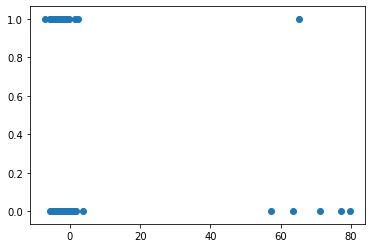

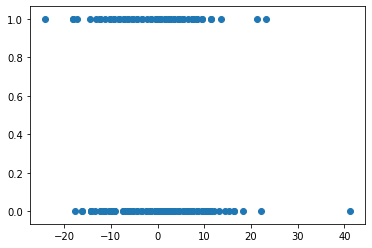

In [343]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[0],Y)
plt.show()
plt.scatter(x_pca[1],Y)
plt.show()

In [0]:
import seaborn as sns

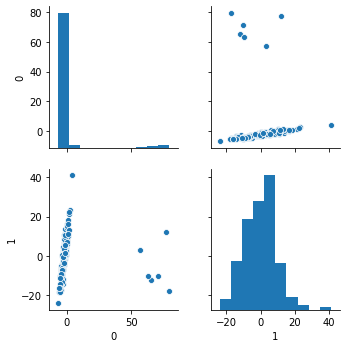

In [345]:
sns.pairplot(x_pca)

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [347]:
true=0
false=0
for i in y_test:
  if i==1.0:
    true=true+1
  else:
    false=false+1
print(true," ",false)

12   24


In [0]:
from sklearn.linear_model import LogisticRegression

In [349]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
from sklearn import metrics

In [351]:
lr_acc=metrics.accuracy_score(y_test,lr_pred)
print(lr_acc)
lr_cm=metrics.confusion_matrix(y_test,lr_pred)
print(lr_cm)
lr_cr=metrics.classification_report(y_test,lr_pred)
print(lr_cr)

0.6944444444444444
[[18  6]
 [ 5  7]]
              precision    recall  f1-score   support

         0.0       0.78      0.75      0.77        24
         1.0       0.54      0.58      0.56        12

    accuracy                           0.69        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.70      0.69      0.70        36



In [0]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred=gnb.predict(x_test)

In [353]:
gnb_acc=metrics.accuracy_score(y_test,gnb_pred)
print(gnb_acc)
gnb_cm=metrics.confusion_matrix(y_test,gnb_pred)
print(gnb_cm)
gnb_cr=metrics.classification_report(y_test,gnb_pred)
print(gnb_cr)

0.3888888888888889
[[ 4 20]
 [ 2 10]]
              precision    recall  f1-score   support

         0.0       0.67      0.17      0.27        24
         1.0       0.33      0.83      0.48        12

    accuracy                           0.39        36
   macro avg       0.50      0.50      0.37        36
weighted avg       0.56      0.39      0.34        36



In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test) 

In [356]:
dtc_acc=metrics.accuracy_score(y_test,dtc_pred)
print(dtc_acc)
dtc_cm=metrics.confusion_matrix(y_test,dtc_pred)
print(dtc_cm)
dtc_cr=metrics.classification_report(y_test,dtc_pred)
print(dtc_cr)

0.6111111111111112
[[16  8]
 [ 6  6]]
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70        24
         1.0       0.43      0.50      0.46        12

    accuracy                           0.61        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.63      0.61      0.62        36



In [0]:
import pydotplus
from sklearn import tree

In [358]:
dot_data=tree.export_graphviz(dtc)
grph=pydotplus.graph_from_dot_data(dot_data)
grph.write_png('tree.png')

True

In [0]:
# files.download('tree.png')

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)

In [362]:
rfc_acc=metrics.accuracy_score(y_test,rfc_pred)
print(rfc_acc)
rfc_cm=metrics.confusion_matrix(y_test,rfc_pred)
print(rfc_cm)
rfc_cr=metrics.classification_report(y_test,rfc_pred)
print(rfc_cr)

0.6944444444444444
[[21  3]
 [ 8  4]]
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        24
         1.0       0.57      0.33      0.42        12

    accuracy                           0.69        36
   macro avg       0.65      0.60      0.61        36
weighted avg       0.67      0.69      0.67        36



In [365]:
from tabulate import tabulate
table = [["Logistic Regression",lr_acc],["Naive Baye's",gnb_acc],["Decision Tree",dtc_acc],["Random Forest",rfc_acc]]
table.sort(key=lambda x:x[1],reverse=True)
print(tabulate(table,headers=["name","accuracy_score"]))

name                   accuracy_score
-------------------  ----------------
Logistic Regression          0.694444
Random Forest                0.694444
Decision Tree                0.611111
Naive Baye's                 0.388889
